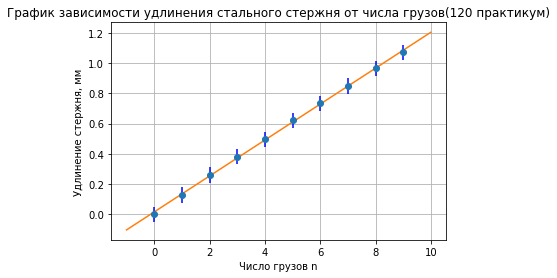

Коэффициент А = [0.11893939] с погрешностью в [0.00550482] 
Коэффициент В = [0.01467273] с погрешностью в [0.02938769]


In [33]:
import numpy as np
import openpyxl
wookbook = openpyxl.load_workbook("Data120.xlsx")
worksheet = wookbook.active
#Массивы данных
x = np.array([[i.value for i in m] for m in worksheet['A2':'A11']])
y = np.array([[i.value for i in m] for m in worksheet['B2':'B11']])
yer = np.array([[i.value for i in m] for m in worksheet['C2':'C11']])
#Рассчет нужных параметров
n=len(x) 
Sn=sum(yer)/n 
Sx=0
Sxx=0
Sy=0
Sxy=0
for i in range(n):
    Sx=Sx+x[i]
    Sxx=Sxx+x[i]*x[i]
    Sy=Sy+y[i]
    Sxy=Sxy+x[i]*y[i]
delta=n*Sxx-Sx*Sx
deltaA=n*Sxy-Sx*Sy
deltaB=Sxx*Sy-Sx*Sxy
#Получение коэффициентов
A=deltaA/delta
B=deltaB/delta
#И их погрешности
Sa=Sn*((abs(n/delta))**0.5)
Sb=Sn*((abs(Sxx/delta))**0.5)
#Построим График
plt.xlabel('Число грузов n')
plt.ylabel('Удлинение стержня, мм')
plt.title('График зависимости удлинения стального стержня от числа грузов(120 практикум)')

plt.grid()
plt.errorbar(x, y, xerr=0, yerr=float(Sn), fmt='o', ecolor='blue')

x = np.linspace(min(x)-n/10, max(x)+n/10, 300)
y = A*x+B

plt.plot(x, y)
plt.show()

print("Коэффициент А =",A,"с погрешностью в",Sa,"\nКоэффициент В =",B,"с погрешностью в",Sb)